# Explanatory Data Analysis

**Features Description**

1. `MEMBER_NO-b` : ID Member
2. `FFP_DATE` : Frequent Flyer Program Join Date
3. `FIRST_FLIGHT_DATE` : Tanggal Penerbangan pertama
4. `GENDER` : Jenis Kelamin
5. `FFP_TIER` : Tier dari Frequent Flyer Program
6. `WORK_CITY` : Kota Asal
7. `WORK_PROVINCE` : Provinsi Asal
8. `WORK_COUNTRY` : Negara Asal
9. `AGE` : Umur Customer
10. `LOAD_TIME` : Tanggal data diambil
11. `FLIGHT_COUNT` : Jumlah penerbangan Customer
12. `BP_SUM` : Rencana Perjalanan
13. `SUM_YR_1` : Fare Revenue
14. `SUM_YR_2` : Votes Prices
15. `SEG_KM_SUM` : Total jarak(km) penerbangan yg sudah dilakukan
16. `LAST_FLIGHT_DATE` : Tanggal penerbangan terakhir
17. `LAST_TO_END` : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
18. `AVG_INTERVAL` : Rata-rata jarak waktu
19. `MAX_INTERVAL` : Maksimal jarak waktu
20. `EXCHANGE_COUNT` : Jumlah penukaran
21. `avg_discount` : Rata rata discount yang didapat customer
22. `Points_Sum` : Jumlah poin yang didapat customer
23. `Point_NotFlight` : point yang tidak digunakan oleh members

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
flight_df = pd.read_csv('flight.csv')

flight_df.head(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

## Data Types and Missing Values

In [3]:
def summarize_dataframe(df):
    summary = pd.DataFrame({
        'Pandas_Dtype': df.dtypes,
        'Python_Type': df.dtypes.apply(lambda x: str(x.type)),
        'Missing_Values': df.isnull().sum(),
        '%_Missing_Values': (df.isnull().mean() * 100).round(2)
    })
    summary.reset_index(inplace=True)
    summary.rename(columns={'index': 'Feature'}, inplace=True)
    return summary

summary_table = summarize_dataframe(flight_df)

summary_table

Feature Pandas_Dtype              Python_Type  Missing_Values  \
0           MEMBER_NO        int64    <class 'numpy.int64'>               0   
1            FFP_DATE       object  <class 'numpy.object_'>               0   
2   FIRST_FLIGHT_DATE       object  <class 'numpy.object_'>               0   
3              GENDER       object  <class 'numpy.object_'>               3   
4            FFP_TIER        int64    <class 'numpy.int64'>               0   
5           WORK_CITY       object  <class 'numpy.object_'>            2269   
6       WORK_PROVINCE       object  <class 'numpy.object_'>            3248   
7        WORK_COUNTRY       object  <class 'numpy.object_'>              26   
8                 AGE      float64  <class 'numpy.float64'>             420   
9           LOAD_TIME       object  <class 'numpy.object_'>               0   
10       FLIGHT_COUNT        int64    <class 'numpy.int64'>               0   
11             BP_SUM        int64    <class 'numpy.int64'>               0   
12           SUM_YR_1      float64  <class 'numpy.float64'>             551   
13           SUM_YR_2      float64  <class 'numpy.float64'>             138   
14         SEG_KM_SUM        int64    <class 'numpy.int64'>               0   
15   LAST_FLIGHT_DATE       object  <class 'numpy.object_'>               0   
16        LAST_TO_END        int64    <class 'numpy.int64'>               0   
17       AVG_INTERVAL      float64  <class 'numpy.float64'>               0   
18       MAX_INTERVAL        int64    <class 'numpy.int64'>               0   
19     EXCHANGE_COUNT        int64    <class 'numpy.int64'>               0   
20       avg_discount      float64  <class 'numpy.float64'>               0   
21         Points_Sum        int64    <class 'numpy.int64'>               0   
22    Point_NotFlight        int64    <class 'numpy.int64'>               0   

    %_Missing_Values  
0               0.00  
1               0.00  
2               0.00  
3               0.00  
4               0.00  
5               3.60  
6               5.16  
7               0.04  
8               0.67  
9               0.00  
10              0.00  
11              0.00  
12              0.87  
13              0.22  
14              0.00  
15              0.00  
16              0.00  
17              0.00  
18              0.00  
19              0.00  
20              0.00  
21              0.00  
22              0.00

## Duplicates

In [4]:
duplicate_rows = flight_df.duplicated(keep='first')

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Univariate Analysis

In [5]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
numerical_features = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 
                    'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 
                    'avg_discount', 'Points_Sum', 'Point_NotFlight']

categorical_features = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY',
                        'LOAD_TIME', 'LAST_FLIGHT_DATE']

### Numerical Attributes

In [7]:
num_attributes_desc = flight_df.describe().transpose()

num_attributes_desc['skewness'] = flight_df[numerical_features].skew()
num_attributes_desc['kurtosis'] = flight_df[numerical_features].kurtosis()

num_attributes_desc

count          mean           std    min           25%  \
MEMBER_NO        62988.0  31494.500000  18183.213715    1.0  15747.750000   
FFP_TIER         62988.0      4.102162      0.373856    4.0      4.000000   
AGE              62568.0     42.476346      9.885915    6.0     35.000000   
FLIGHT_COUNT     62988.0     11.839414     14.049471    2.0      3.000000   
BP_SUM           62988.0  10925.081254  16339.486151    0.0   2518.000000   
SUM_YR_1         62437.0   5355.376064   8109.450147    0.0   1003.000000   
SUM_YR_2         62850.0   5604.026014   8703.364247    0.0    780.000000   
SEG_KM_SUM       62988.0  17123.878691  20960.844623  368.0   4747.000000   
LAST_TO_END      62988.0    176.120102    183.822223    1.0     29.000000   
AVG_INTERVAL     62988.0     67.749788     77.517866    0.0     23.370370   
MAX_INTERVAL     62988.0    166.033895    123.397180    0.0     79.000000   
EXCHANGE_COUNT   62988.0      0.319775      1.136004    0.0      0.000000   
avg_discount     62988.0      0.721558      0.185427    0.0      0.611997   
Points_Sum       62988.0  12545.777100  20507.816700    0.0   2775.000000   
Point_NotFlight  62988.0      2.728155      7.364164    0.0      0.000000   

                          50%           75%       max      skewness  \
MEMBER_NO        31494.500000  47241.250000   62988.0  1.320447e-18   
FFP_TIER             4.000000      4.000000       6.0  3.873291e+00   
AGE                 41.000000     48.000000     110.0  6.259513e-01   
FLIGHT_COUNT         7.000000     15.000000     213.0  3.215305e+00   
BP_SUM            5700.000000  12831.000000  505308.0  5.660473e+00   
SUM_YR_1          2800.000000   6574.000000  239560.0  5.088035e+00   
SUM_YR_2          2773.000000   6845.750000  234188.0  4.601346e+00   
SEG_KM_SUM        9994.000000  21271.250000  580717.0  3.884612e+00   
LAST_TO_END        108.000000    268.000000     731.0  1.178071e+00   
AVG_INTERVAL        44.666667     82.000000     728.0  3.207375e+00   
MAX_INTERVAL       143.000000    228.000000     728.0  1.073333e+00   
EXCHANGE_COUNT       0.000000      0.000000      46.0  8.199608e+00   
avg_discount         0.711856      0.809476       1.5  9.567933e-01   
Points_Sum        6328.500000  14302.500000  985572.0  8.383897e+00   
Point_NotFlight      0.000000      1.000000     140.0  4.270492e+00   

                   kurtosis  
MEMBER_NO         -1.200000  
FFP_TIER          14.758710  
AGE                0.385115  
FLIGHT_COUNT      16.242771  
BP_SUM            63.419173  
SUM_YR_1          54.303618  
SUM_YR_2          41.997707  
SEG_KM_SUM        31.251869  
LAST_TO_END        0.391237  
AVG_INTERVAL      14.488004  
MAX_INTERVAL       1.267708  
EXCHANGE_COUNT   140.494672  
avg_discount       2.836082  
Points_Sum       187.221062  
Point_NotFlight   26.562906

Distribution

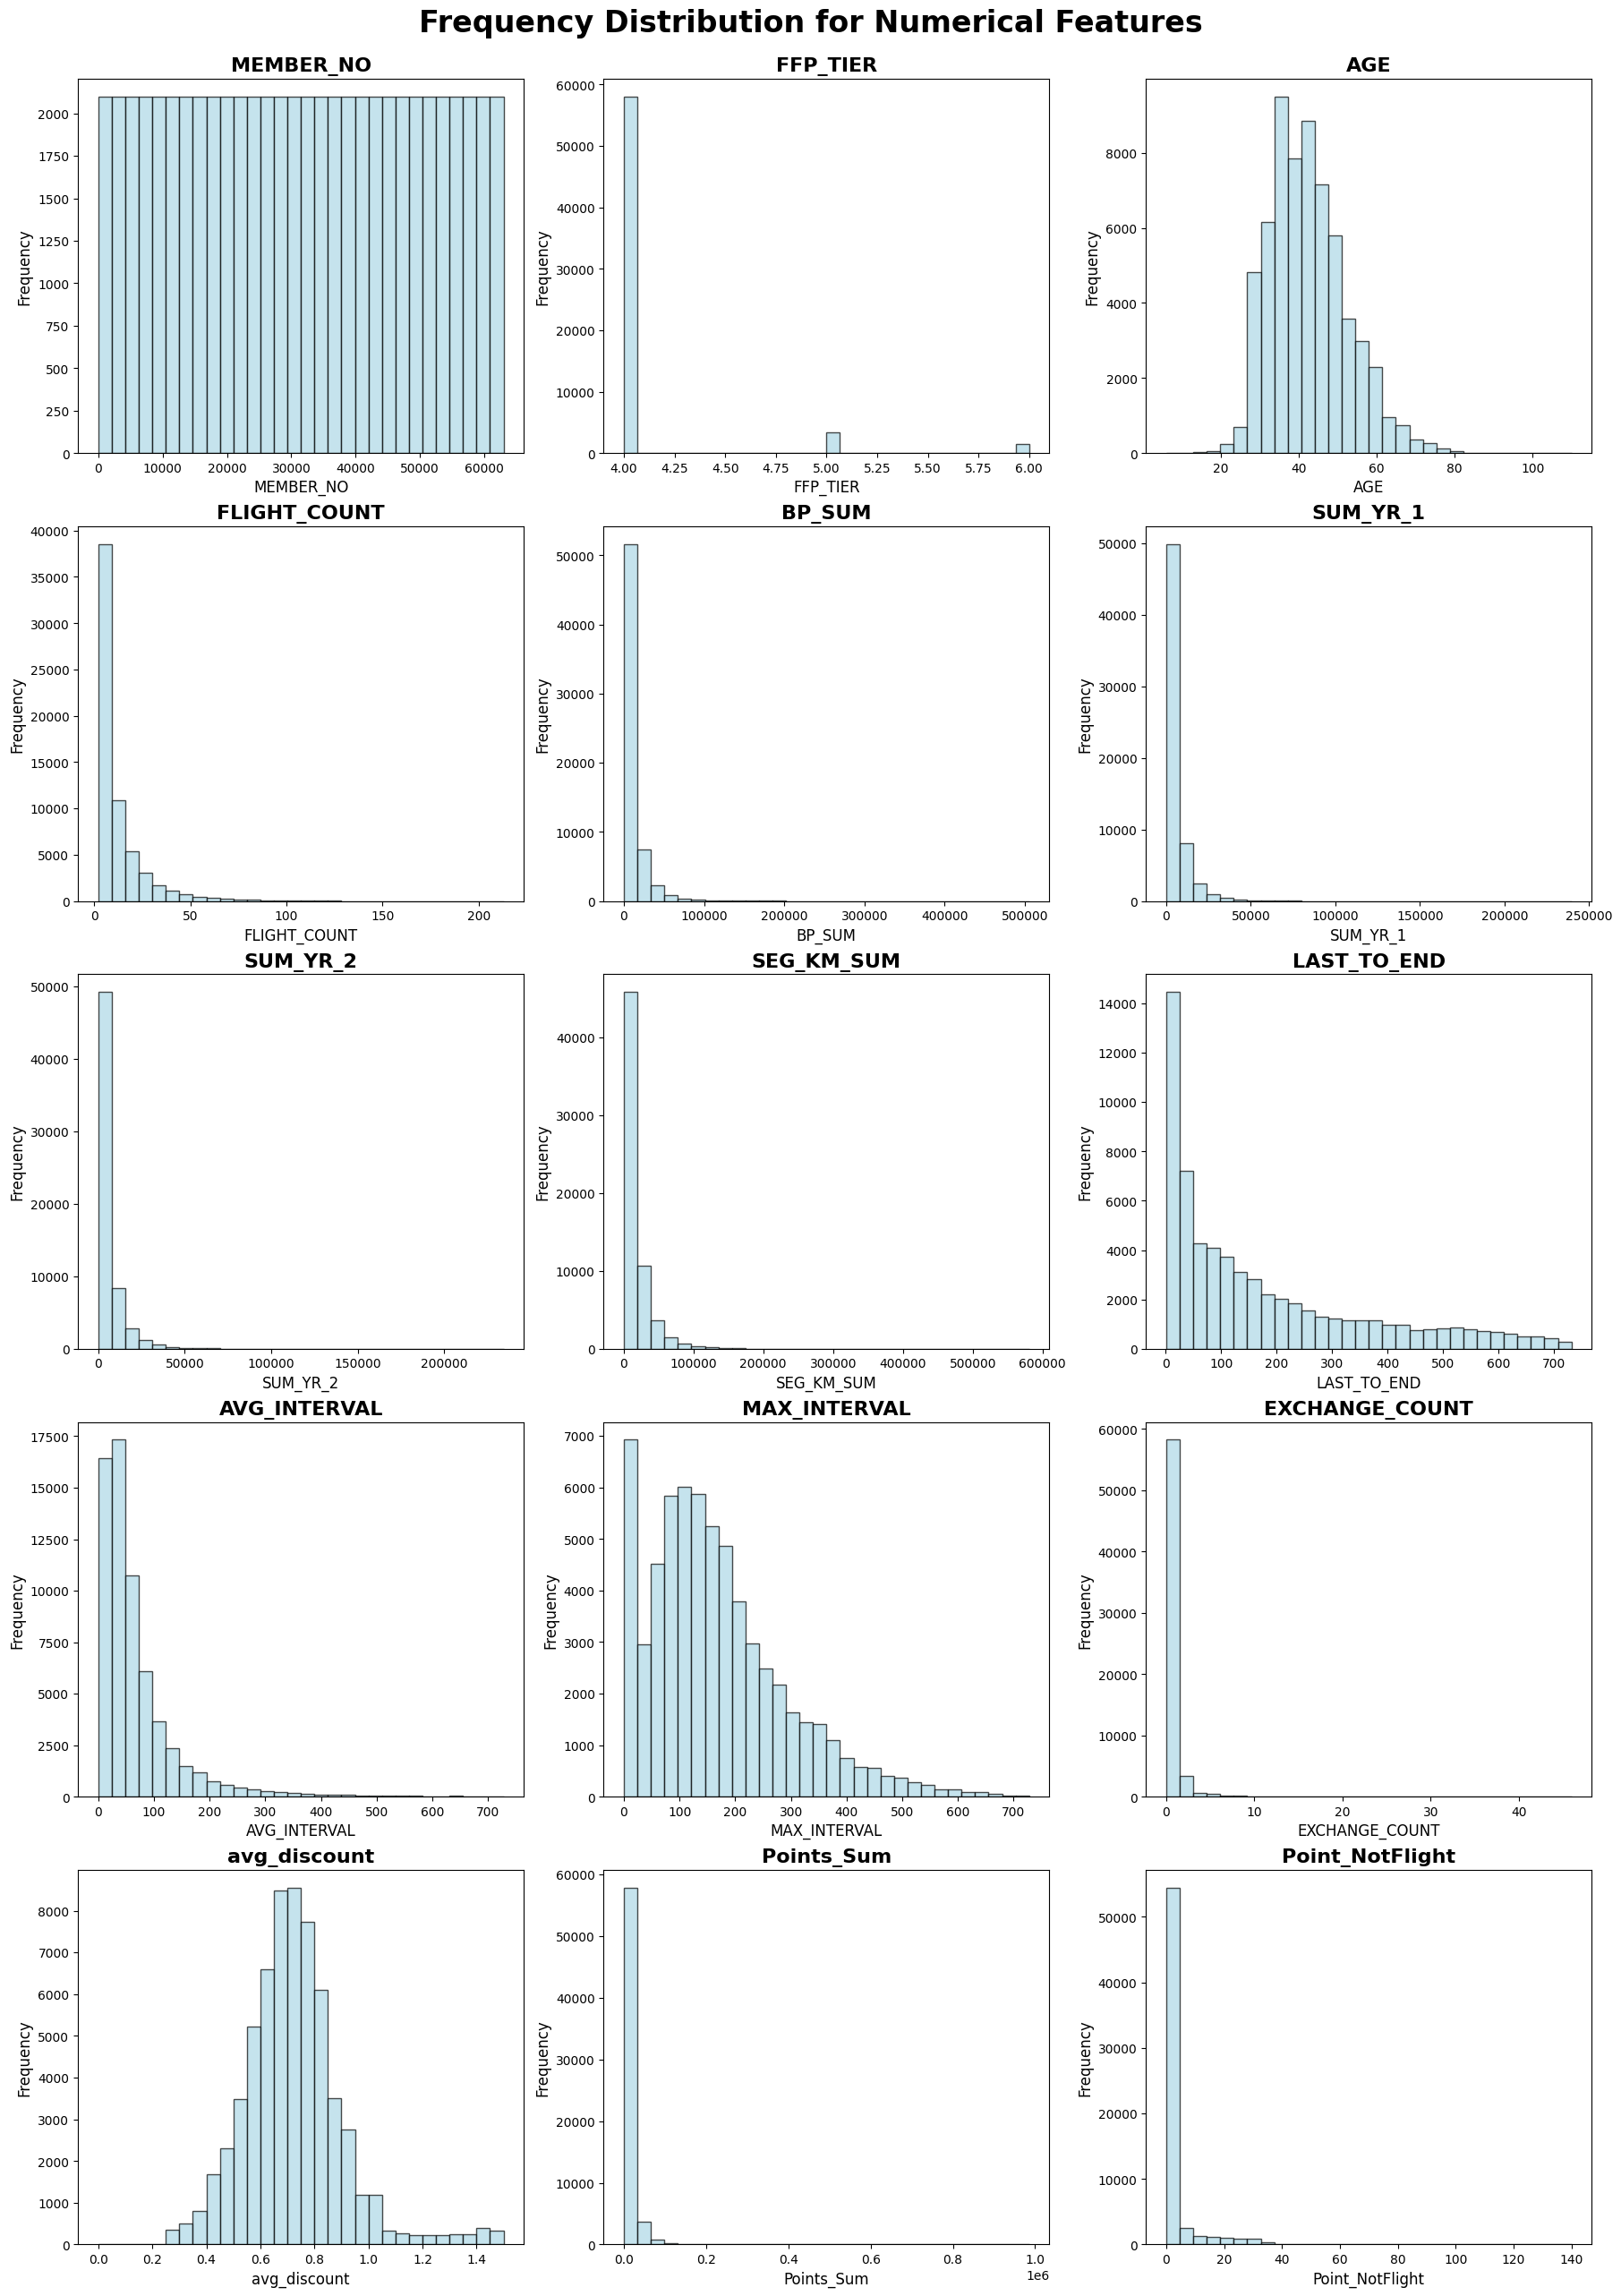

In [14]:
def visualize_num_distribution(df, numerical_features):
    num_features = len(numerical_features)
    num_rows = (num_features + 2) // 3 

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
    fig.suptitle("Frequency Distribution for Numerical Features", fontsize=24, fontweight='bold', y=1.02)
    axes = axes.flatten()

    for i, col in enumerate(numerical_features):
        df[col].plot(
            kind="hist", bins=30, color="lightblue", alpha=0.7, edgecolor="black", ax=axes[i]
        )
        axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

visualize_num_distribution(flight_df, numerical_features)

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

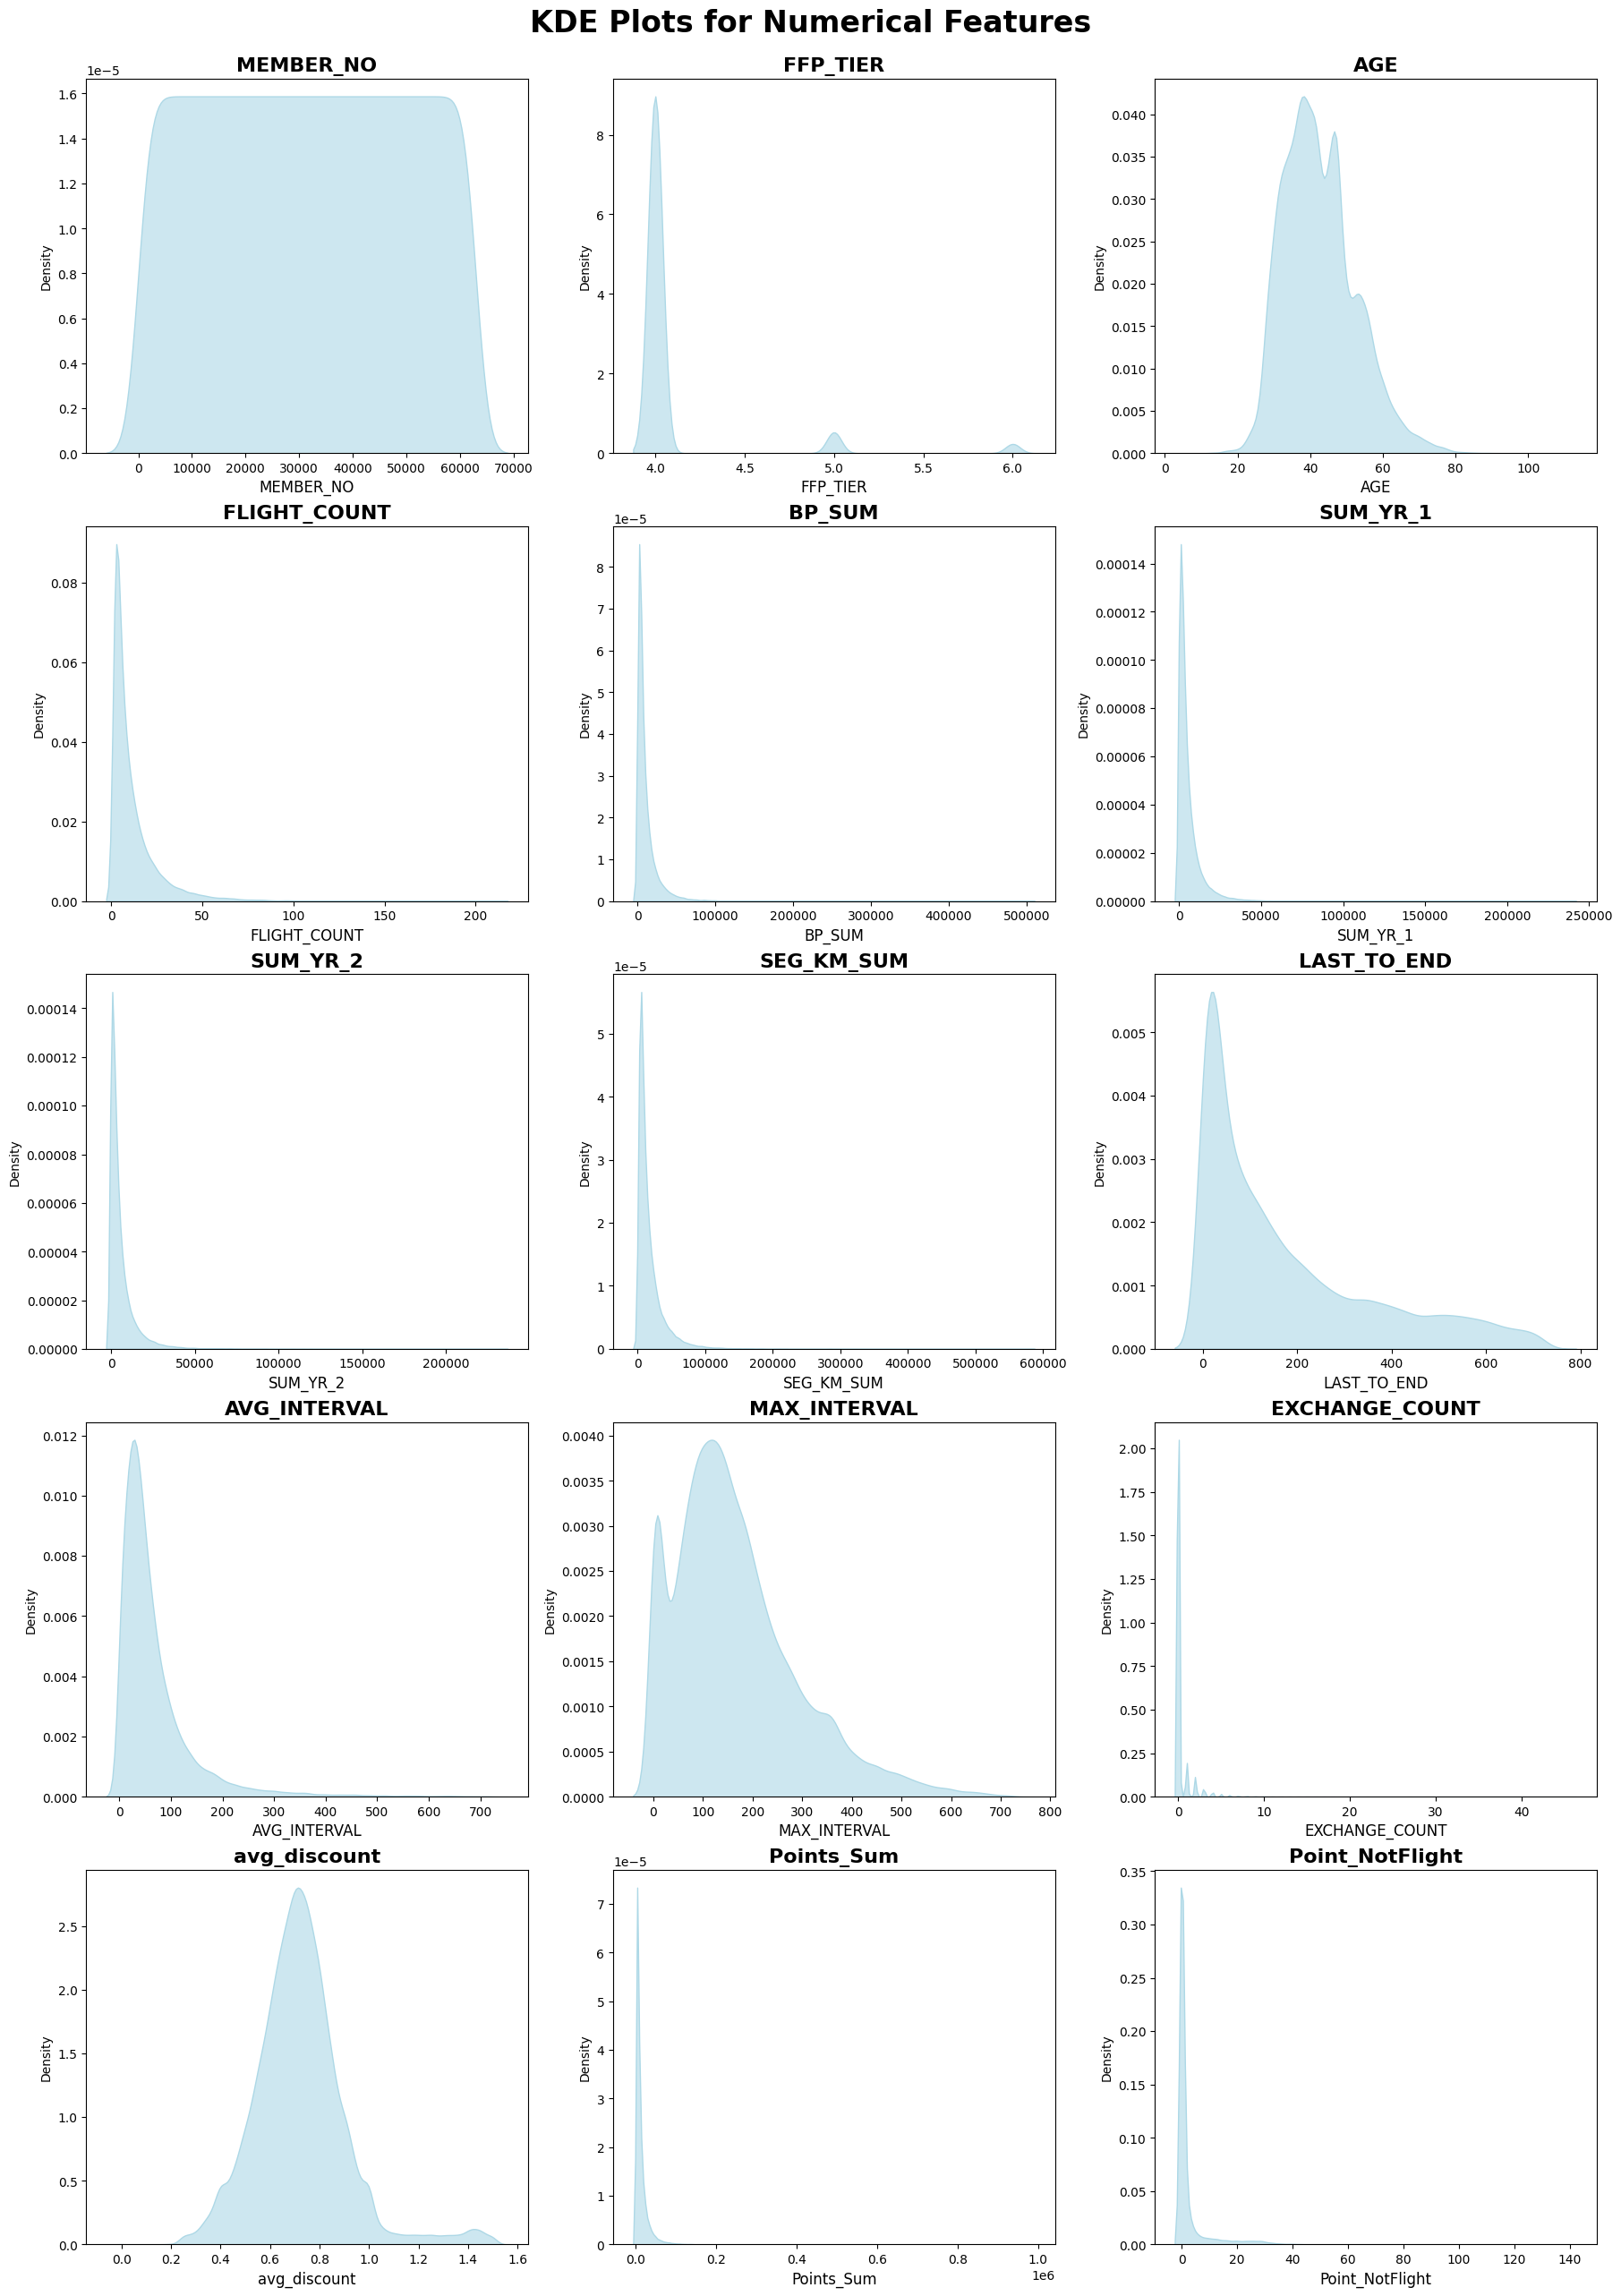

In [19]:
def visualize_num_kde(df, numerical_features):
    num_features = len(numerical_features)
    num_rows = (num_features + 2) // 3 
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
    fig.suptitle("KDE Plots for Numerical Features", fontsize=24, fontweight='bold', y=1.02)
    axes = axes.flatten()
    for i, col in enumerate(numerical_features):
        sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
        axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.show()

visualize_num_kde(flight_df, numerical_features)

### Categorical attributes

C:\Users\fizuf\AppData\Local\Temp\ipykernel_20208\456796693.py:28: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fizuf\AppData\Local\Temp\ipykernel_20208\456796693.py:28: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fizuf\AppData\Local\Temp\ipykernel_20208\456796693.py:28: UserWarning: Glyph 65294 (\N{FULLWIDTH FULL STOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fizuf\AppData\Local\Temp\ipykernel_20208\456796693.py:28: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fizuf\AppData\Local\Temp\ipykernel_20208\456796693.py:28: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\fizuf\AppData\Local\Temp\ipykernel_20208\456796693.py:28: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missin

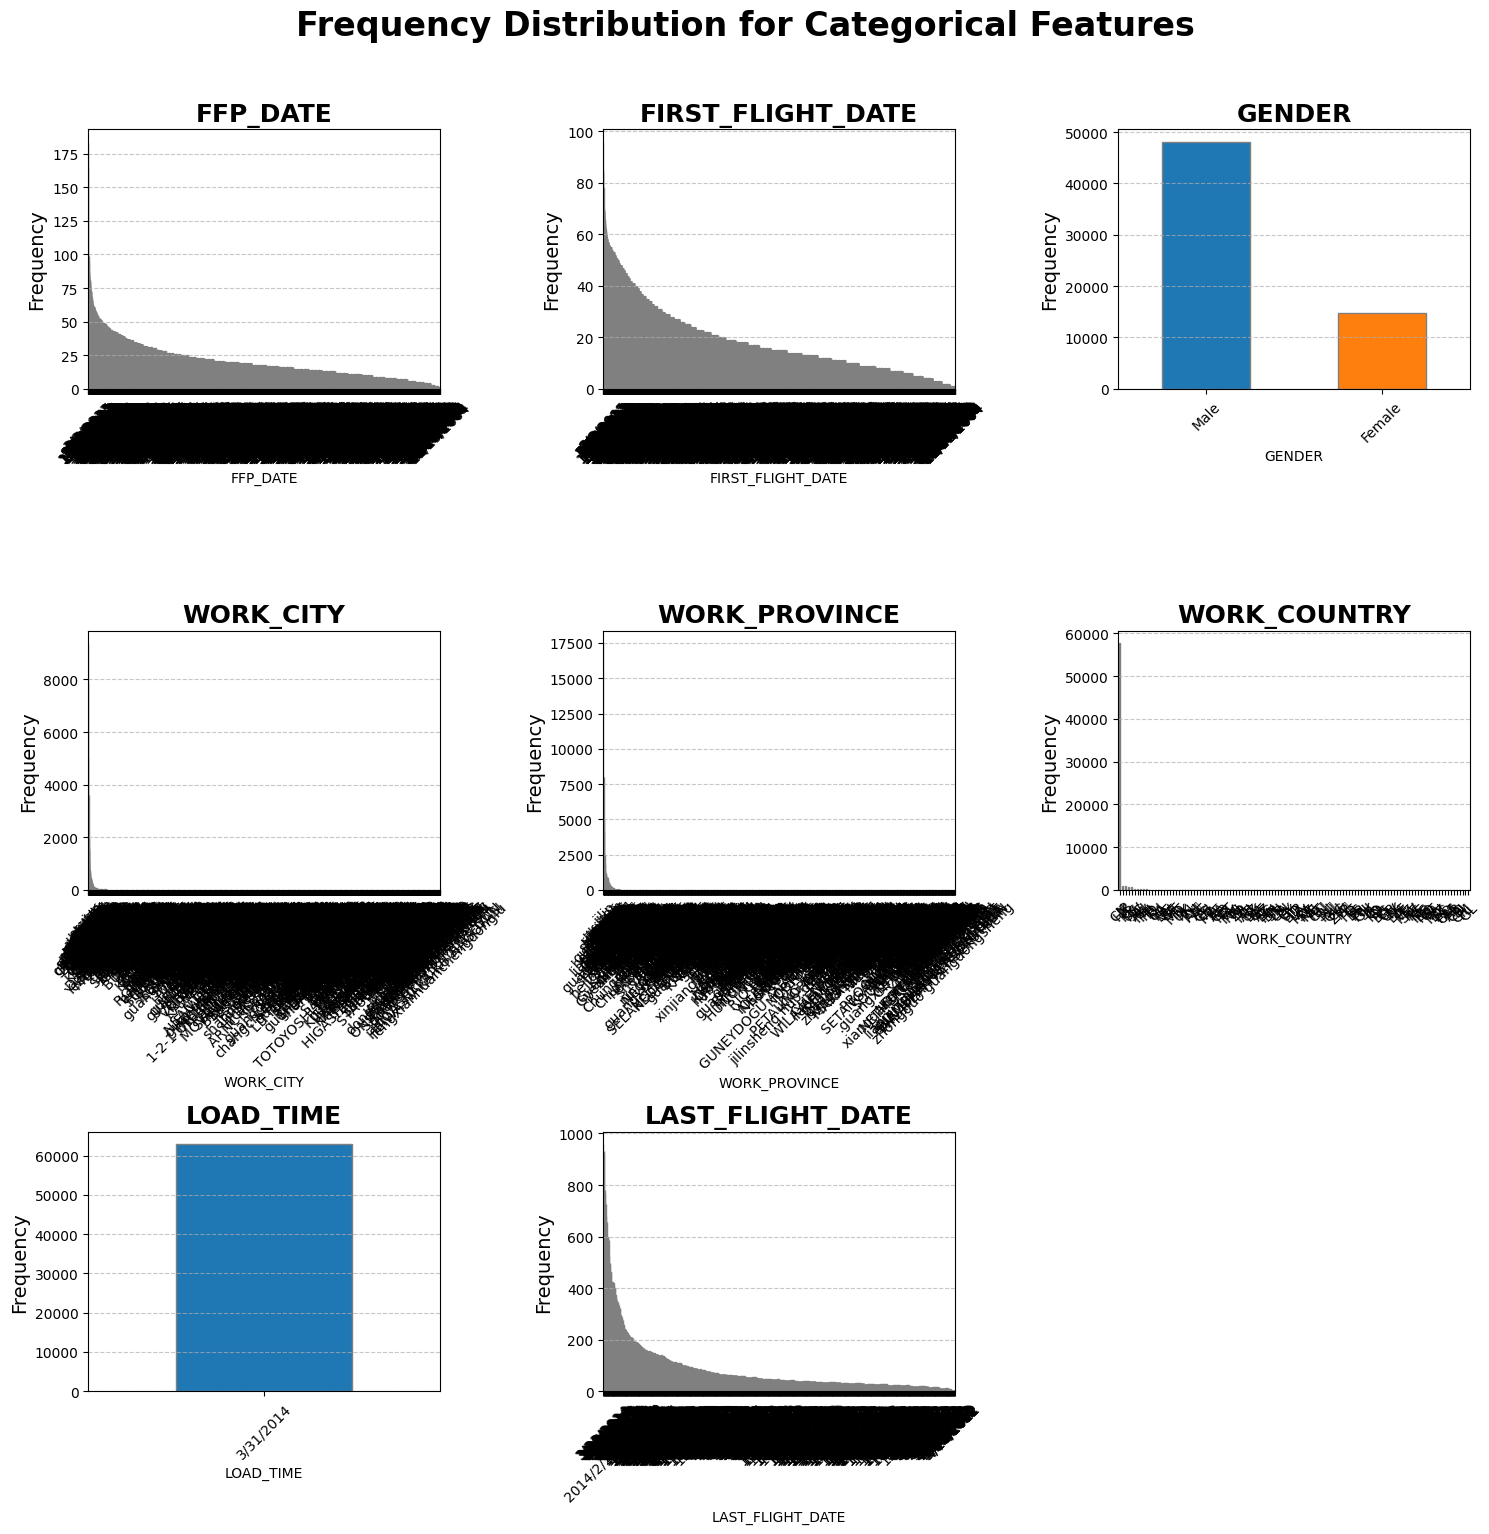

In [21]:
def visualize_cat_distribution(df, categorical_features):
    num_rows = (len(categorical_features) + 2) // 3 
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows), constrained_layout=True)

    fig.suptitle("Frequency Distribution for Categorical Features", fontsize=24, fontweight='bold', y=1.02)

    axes = axes.flatten()

    for i, column in enumerate(categorical_features):
        ax = axes[i]
        
        value_counts = df[column].value_counts()
        colors = plt.cm.tab10(range(len(value_counts)))
        
        value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="grey")
        
        ax.set_title(f"{column}", fontsize=18, fontweight='bold')
        ax.set_ylabel("Frequency", fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='x', labelrotation=45)

    for j in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

visualize_cat_distribution(flight_df, categorical_features)

In [23]:
high_cardinality_features = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LAST_FLIGHT_DATE']

category_counts = pd.DataFrame({
    'Feature': high_cardinality_features,
    'Number_of_Categories': [flight_df[feature].nunique() for feature in high_cardinality_features]
})

category_counts


Feature  Number_of_Categories
0           FFP_DATE                  3068
1  FIRST_FLIGHT_DATE                  3406
2          WORK_CITY                  3234
3      WORK_PROVINCE                  1165
4       WORK_COUNTRY                   118
5   LAST_FLIGHT_DATE                   731

💡Insights:

- Single-valued features : `LOAD_TIME`
- High cardinality features: `FFP_DATE`, `FIRST_FLIGHT_DATE`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `LAST_FLIGHT_DATE`

## Multivariate Analysis

### Numerical Features

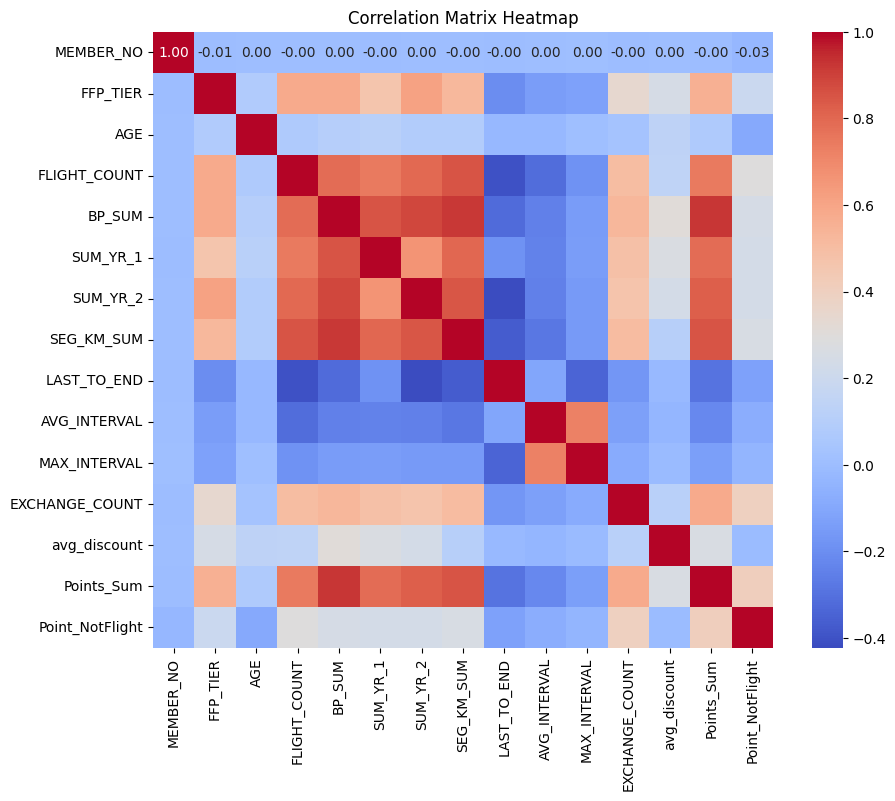

In [30]:
correlation_matrix = flight_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

💡Insights:
- Pairs features with high correlation (>0.7): 
    - (`BP_SUM`, `FLIGHT_COUNT`): 0.788379
    - (`BP_SUM`, `SUM_YR_1`): 0.850624
    - (`BP_SUM`, `SUM_YR_2`): 0.884632
    - (`BP_SUM`, `SEG_KM_SUM`): 0.921724
    - (`BP_SUM`, `Points_Sum`): 0.747092
    - (`SUM_YR_1`, `FLIGHT_COUNT`): 0.748032
    - (`SUM_YR_1`, `SEG_KM_SUM`): 0.804125
    - (`SUM_YR_1`, `Points_Sum`): 0.788354
    - (`SUM_YR_2`, `Points_Sum`): 0.826666
    - (`SEG_KM_SUM`, `FLIGHT_COUNT`): 0.850411
    - (`SEG_KM_SUM`, `SUM_YR_2`): 0.849195
    - (`SEG_KM_SUM`, `Points_Sum`): 0.853014

In [31]:
correlation_matrix

MEMBER_NO  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  \
MEMBER_NO         1.000000 -0.005910  0.001259     -0.000276  0.000063   
FFP_TIER         -0.005910  1.000000  0.078654      0.582447  0.581085   
AGE               0.001259  0.078654  1.000000      0.073246  0.100501   
FLIGHT_COUNT     -0.000276  0.582447  0.073246      1.000000  0.788379   
BP_SUM            0.000063  0.581085  0.100501      0.788379  1.000000   
SUM_YR_1         -0.002529  0.463122  0.111815      0.748032  0.850624   
SUM_YR_2          0.001185  0.611385  0.083743      0.794838  0.884632   
SEG_KM_SUM       -0.000032  0.522350  0.087254      0.850411  0.921724   
LAST_TO_END      -0.002588 -0.206313 -0.025600     -0.404999 -0.319039   
AVG_INTERVAL      0.002479 -0.144928 -0.024613     -0.316833 -0.246764   
MAX_INTERVAL      0.004761 -0.127641  0.009382     -0.188682 -0.147953   
EXCHANGE_COUNT   -0.003844  0.342355  0.029604      0.502501  0.530021   
avg_discount      0.001727  0.248845  0.133235      0.139377  0.307245   
Points_Sum       -0.003613  0.559249  0.074757      0.747092  0.923271   
Point_NotFlight  -0.033204  0.192803 -0.092282      0.291880  0.244254   

                 SUM_YR_1  SUM_YR_2  SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
MEMBER_NO       -0.002529  0.001185   -0.000032    -0.002588      0.002479   
FFP_TIER         0.463122  0.611385    0.522350    -0.206313     -0.144928   
AGE              0.111815  0.083743    0.087254    -0.025600     -0.024613   
FLIGHT_COUNT     0.748032  0.794838    0.850411    -0.404999     -0.316833   
BP_SUM           0.850624  0.884632    0.921724    -0.319039     -0.246764   
SUM_YR_1         1.000000  0.663009    0.804125    -0.186173     -0.243309   
SUM_YR_2         0.663009  1.000000    0.849195    -0.423420     -0.246290   
SEG_KM_SUM       0.804125  0.849195    1.000000    -0.369509     -0.280746   
LAST_TO_END     -0.186173 -0.423420   -0.369509     1.000000     -0.108594   
AVG_INTERVAL    -0.243309 -0.246290   -0.280746    -0.108594      1.000000   
MAX_INTERVAL    -0.145206 -0.154905   -0.155508    -0.343939      0.724392   
EXCHANGE_COUNT   0.488029  0.468149    0.507819    -0.169717     -0.130226   
avg_discount     0.268884  0.234652    0.108393    -0.021036     -0.038814   
Points_Sum       0.788354  0.826666    0.853014    -0.292027     -0.220946   
Point_NotFlight  0.235095  0.237954    0.259037    -0.124074     -0.075967   

                 MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
MEMBER_NO            0.004761       -0.003844      0.001727   -0.003613   
FFP_TIER            -0.127641        0.342355      0.248845    0.559249   
AGE                  0.009382        0.029604      0.133235    0.074757   
FLIGHT_COUNT        -0.188682        0.502501      0.139377    0.747092   
BP_SUM              -0.147953        0.530021      0.307245    0.923271   
SUM_YR_1            -0.145206        0.488029      0.268884    0.788354   
SUM_YR_2            -0.154905        0.468149      0.234652    0.826666   
SEG_KM_SUM          -0.155508        0.507819      0.108393    0.853014   
LAST_TO_END         -0.343939       -0.169717     -0.021036   -0.292027   
AVG_INTERVAL         0.724392       -0.130226     -0.038814   -0.220946   
MAX_INTERVAL         1.000000       -0.089417     -0.016392   -0.135977   
EXCHANGE_COUNT      -0.089417        1.000000      0.112589    0.578581   
avg_discount        -0.016392        0.112589      1.000000    0.263882   
Points_Sum          -0.135977        0.578581      0.263882    1.000000   
Point_NotFlight     -0.042843        0.396115     -0.010315    0.406905   

                 Point_NotFlight  
MEMBER_NO              -0.033204  
FFP_TIER                0.192803  
AGE                    -0.092282  
FLIGHT_COUNT            0.291880  
BP_SUM                  0.244254  
SUM_YR_1                0.235095  
SUM_YR_2                0.237954  
SEG_KM_SUM              0.259037  
LAST_TO_END            -0.124074  
AVG_INTERVAL           -0.075967

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

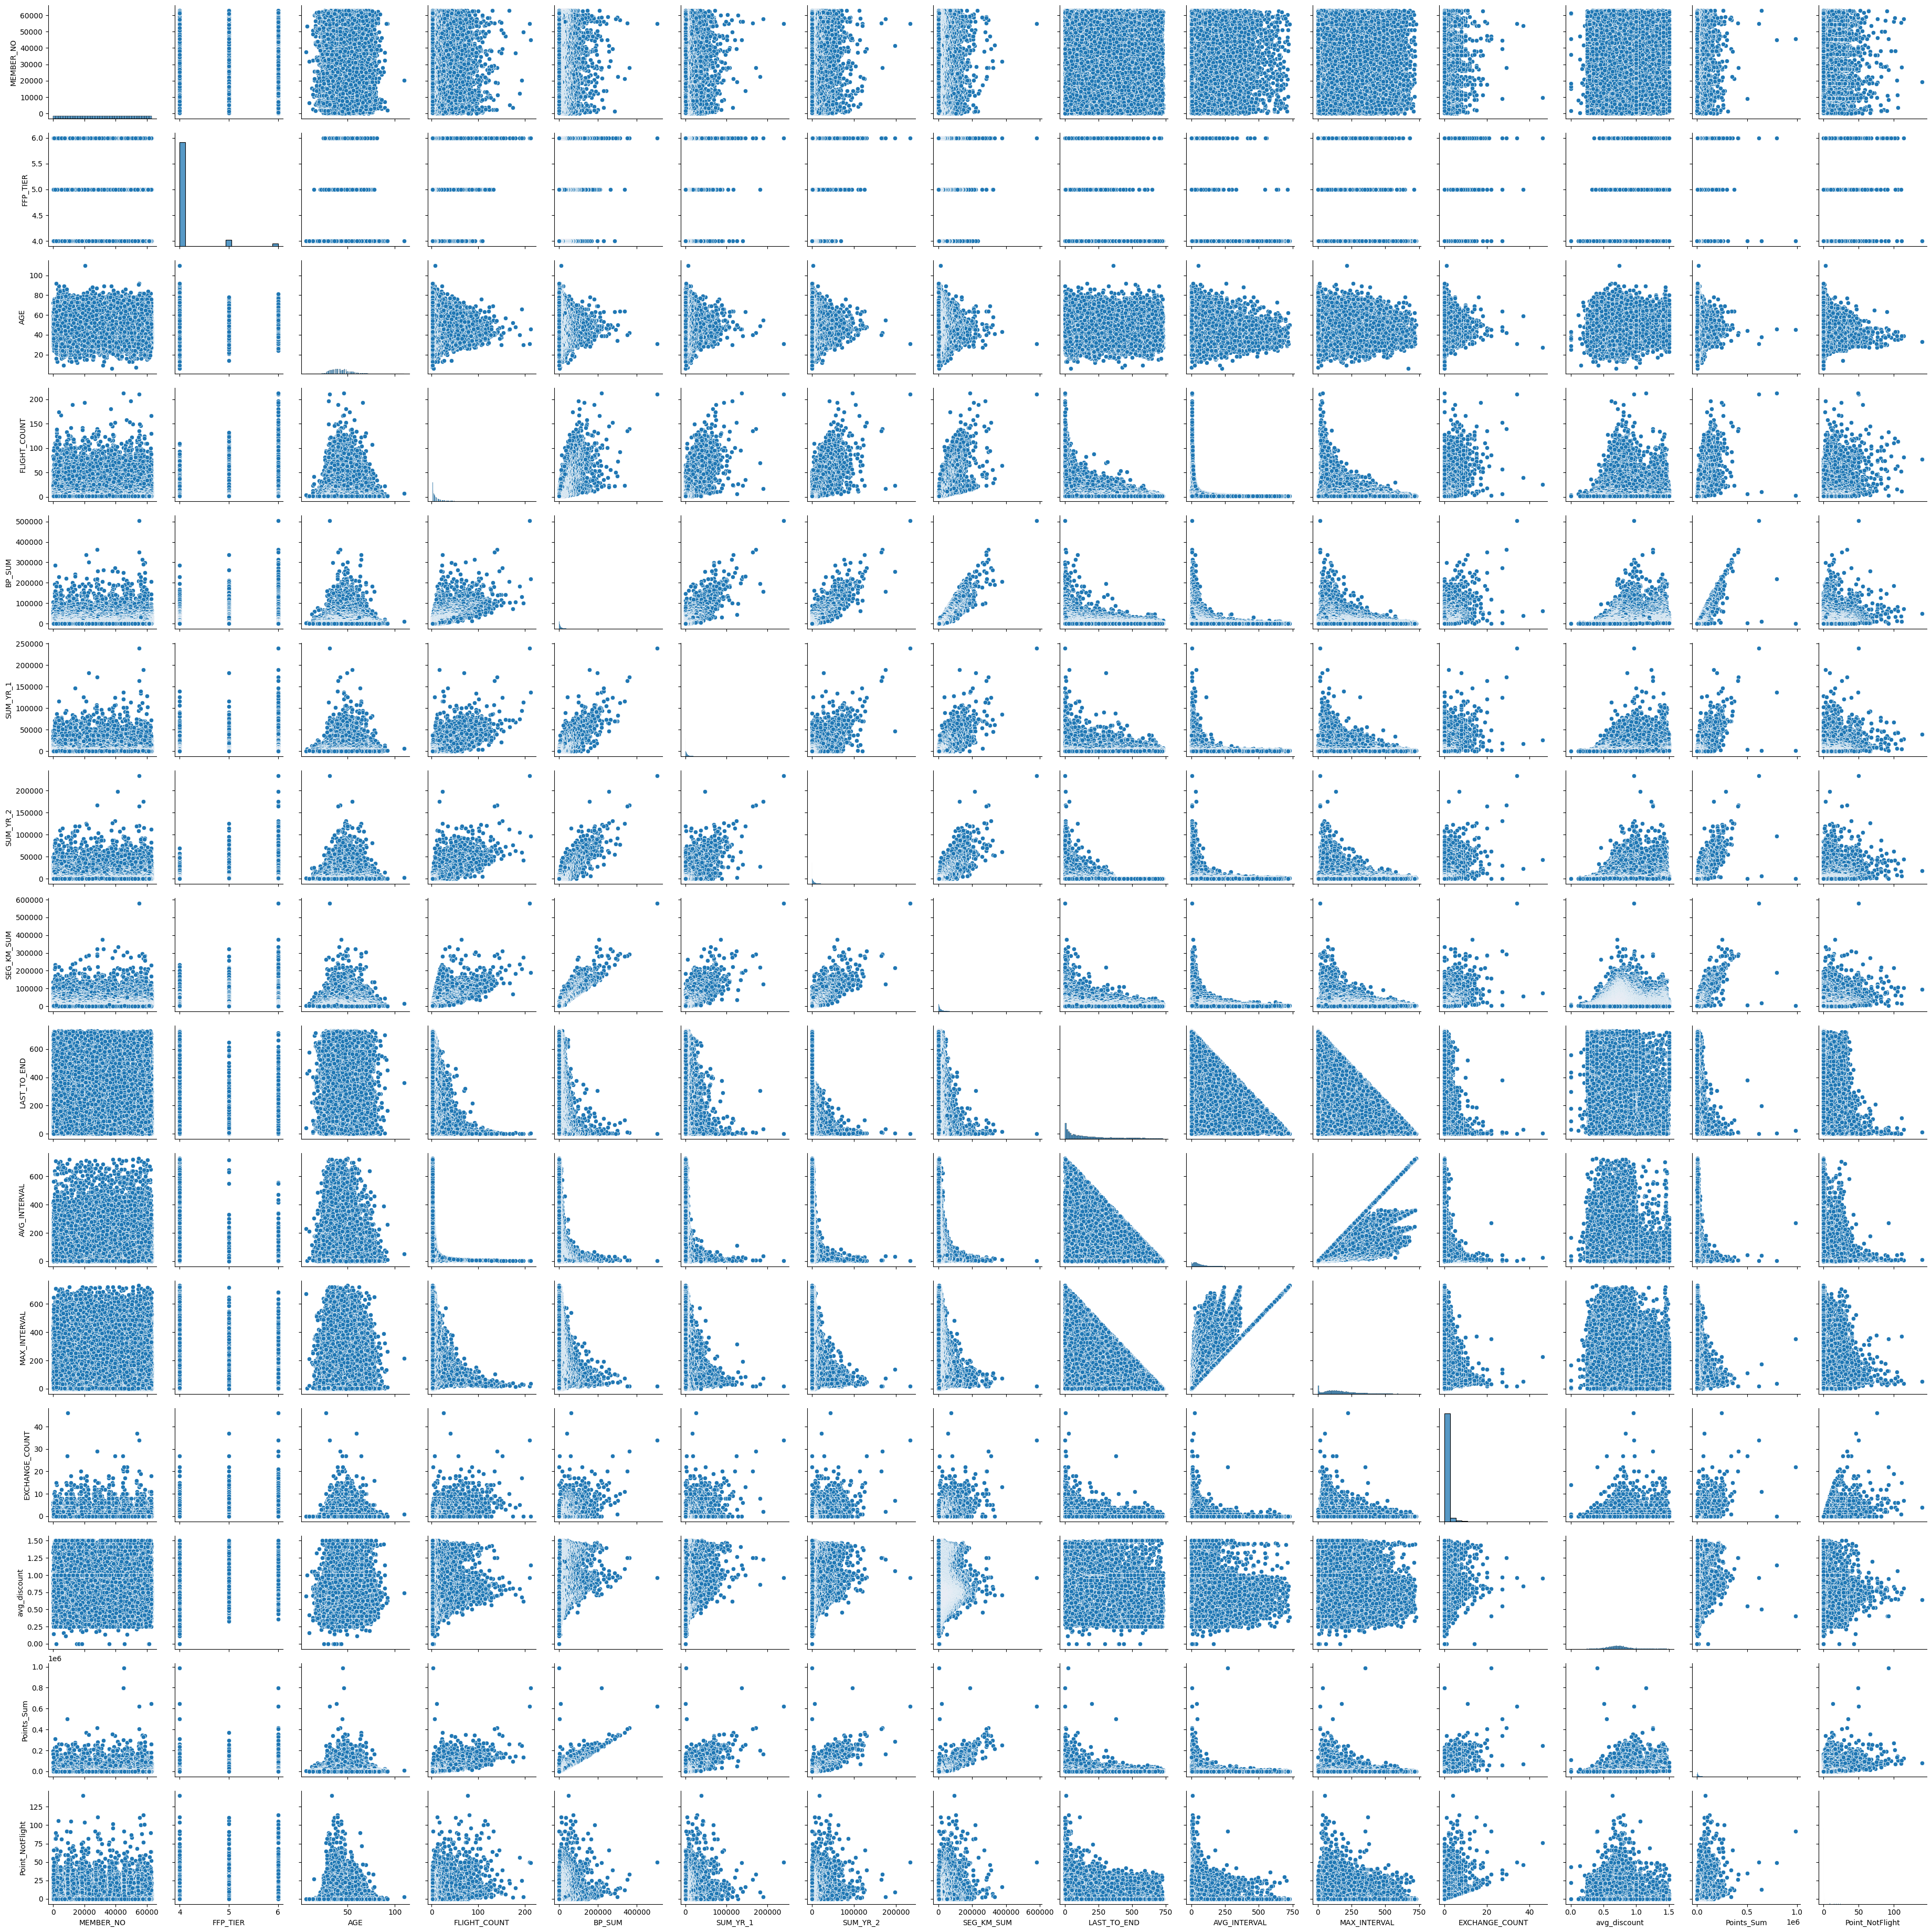

In [33]:
sns.pairplot(flight_df)
plt.show()